# DSCI 503 - Homework 06

## Frederick Arko Larbi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.txt', sep='\t')
ames = pd.read_csv('ames_housing.txt', sep='\t')
titanic = pd.read_csv('titanic.txt', sep='\t')
batting = pd.read_csv('batting.csv', sep=',')

In [3]:
iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor
5,5.8,2.7,3.9,1.2,versicolor
6,6.0,3.4,4.5,1.6,versicolor
7,7.7,3.0,6.1,2.3,virginica


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_means = iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']].\
groupby('species').mean()

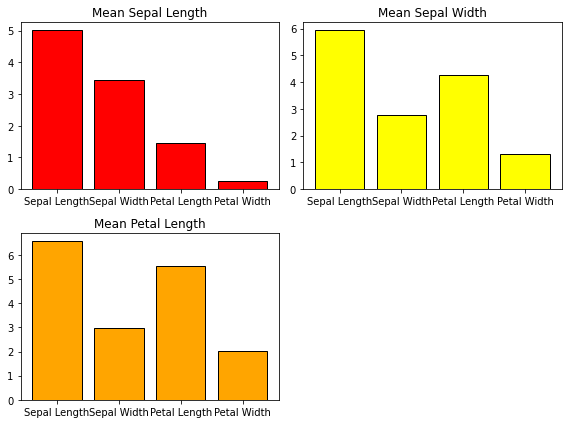

In [6]:
iris_colors = ['red', 'yellow', 'orange']
iris_columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

plt.figure(figsize=[8,6])


for i in range(0,len(iris_means)):
    plt.subplot(2,2,i+1)
    plt.bar(x = iris_columns, height = iris_means.iloc[i, : ], label = iris_means.index[i], 
            color = iris_colors[i], edgecolor = 'black')
    plt.title('Mean '+ iris_columns[i] + '')
    
    
    
plt.tight_layout()     
plt.show()   



## Problem 2: Ames Housing - Neighborhoods

In this problem, we will use grouping operations to determine the mean sale price for houses in each of the 28 neighborhoods in the Ames Housing dataset.

In [7]:
ames.head(8)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500


In [8]:
ames.columns.values

array(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',

In [31]:
ames_nbhd = ames.loc[:, ['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean().sort_values(by='SalePrice')

ames_nbhd.head()

,SalePrice
Neighborhood,
MeadowV,95756.486486
IDOTRR,103752.903226
BrDale,105608.333333
OldTown,123991.891213
BrkSide,124756.250000


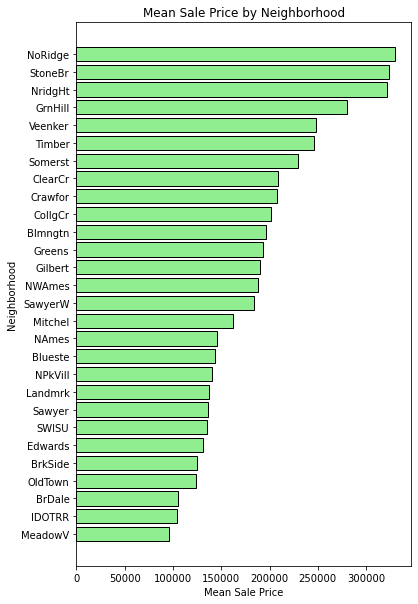

In [32]:
plt.figure(figsize=[6,10])

plt.barh(ames_nbhd.index, ames_nbhd.loc[:, 'SalePrice'], color = 'lightgreen', edgecolor = 'black')
plt.xlabel('Mean Sale Price')
plt.ylabel('Neighborhood')
plt.title('Mean Sale Price by Neighborhood')
plt.show()

## Problem 3: Ames Housing - House Styles

In this problem, we will use grouping operations to determine the number of houses sold for each of the eight house styles provided in the Ames Housing dataset.

In [11]:
ames_style = ames.loc[:, ['House Style', 'SalePrice']].groupby('House Style').count().sort_values(by='SalePrice')
ames_style.rename(columns={'SalePrice':'Count'}, inplace=True)
ames_style

,Count
House Style,
2.5Fin,8
1.5Unf,19
2.5Unf,24
SFoyer,83
SLvl,128
1.5Fin,314
2Story,873
1Story,1481


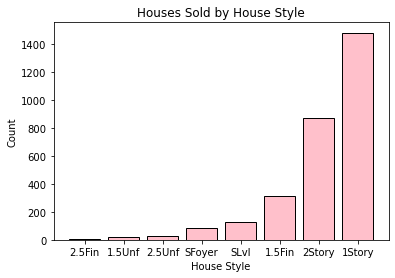

In [12]:
plt.figure(figsize=[6,4])

plt.bar(ames_style.index, ames_style.loc[:, 'Count'], color = 'pink', edgecolor = 'black')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('Houses Sold by House Style')
plt.show()

## Problem 4: Titanic Dataset – Survival Rates

In this problem, we will determine how passenger class and sex affected the survival rates of passengers on the Titanic.

In [13]:
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [14]:
def round_to_four_deci(flt):
    return round(float(flt), 4)

print('Proportion of Passengers who survived: ', round_to_four_deci((titanic.loc[:, 'Survived'].mean())))

Proportion of Passengers who survived:  0.3856


In [15]:
surv_rates = titanic.loc[:, ['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()
surv_rates

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

## Problem 5: Titanic Dataset – Sex Distribution by Class and Outcome

In this problem, we will determine the distribution of males and females for each of the three passenger classes, and for each of the two survival outcomes. To accomplish this task, we will first need to add two new columns to the titanic DataFrame.

In [16]:
titanic.loc[:, 'Female'] = np.where(titanic.loc[:, 'Sex'] == 'female', 1, 0)
titanic.loc[:, 'Male'] = np.where(titanic.loc[:, 'Sex'] == 'male', 1, 0)
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Female,Male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,1
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,1
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,0,1


In [17]:
sex_dist_by_class = titanic.loc[:, ['Pclass', 'Female', 'Male']].groupby(['Pclass']).sum()
sex_dist_by_class

,Female,Male
Pclass,,
1,94,122
2,76,108
3,144,343


In [18]:
sex_dist_by_outcome = titanic.loc[:, ['Survived', 'Female', 'Male']].groupby(['Survived']).sum()
sex_dist_by_outcome

,Female,Male
Survived,,
0,81,464
1,233,109


## Problem 6: Batting Data – Home Runs

In this problem, we will determine which Major League Baseball teams have had the most home runs in a single season, and which teams have had the highest lifetime average number of home runs per season.

In [19]:
batting.head(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [20]:
print(batting.columns.values)

['playerID' 'yearID' 'stint' 'teamID' 'lgID' 'G' 'AB' 'R' 'H' '2B' '3B'
 'HR' 'RBI' 'SB' 'CS' 'BB' 'SO' 'IBB' 'HBP' 'SH' 'SF' 'GIDP']


In [21]:
total_hr = batting.loc[:, ['teamID', 'yearID', 'HR']].groupby(['teamID', 'yearID'], as_index = False).\
sum().sort_values(by='HR', ascending=False)


total_hr.head(10)

,teamID,yearID,HR
1840,NYA,2018,267
2384,SEA,1997,264
2722,TEX,2005,260
2771,TOR,2010,257
125,BAL,1996,257
145,BAL,2016,253
1273,HOU,2000,249
2718,TEX,2001,246
1834,NYA,2012,245
2383,SEA,1996,245


In [22]:
avg_hr = total_hr.loc[:, ['teamID', 'HR']].groupby(['teamID'],  as_index=False ).mean().\
sort_values(by='HR', ascending=False)
avg_hr.head(10)

,teamID,HR
50,COL,181.769231
77,MIL,180.761905
79,ML1,171.538462
2,ARI,170.142857
133,TOR,168.452381
1,ANA,165.500000
130,TEX,163.851064
129,TBA,162.714286
95,OAK,158.196078
4,BAL,157.923077


## Problem 7: Batting Data – Batting Averages

In this problem, we will determine which Major League Baseball teams have had the highest batting average during a single season.

In [23]:
batting_avg = batting.loc[:, ['teamID', 'yearID', 'H', 'AB']].groupby(['teamID', 'yearID'], as_index = False ).sum()


batting_avg.loc[:, 'BA'] = (batting_avg.loc[:, 'H']) / (batting_avg.loc[:, 'AB'])

batting_avg.sort_values(by='BA', ascending=False)
batting_avg.head(10)

,teamID,yearID,H,AB,BA
0,ALT,1884,223,899,0.248053
1,ANA,1997,1531,5628,0.272033
2,ANA,1998,1530,5630,0.271758
3,ANA,1999,1404,5494,0.255552
4,ANA,2000,1574,5628,0.279673
5,ANA,2001,1447,5551,0.260674
6,ANA,2002,1603,5678,0.282318
7,ANA,2003,1473,5487,0.268453
8,ANA,2004,1603,5675,0.282467
9,ARI,1998,1353,5491,0.246403


## Problem 8: Batting Data – Cardinals vs. Cubs

In this problem, we will calculate the batting average and the number of home runs for the St. Louis Cardinals and the Chicago Cubs during every season since 1900. We will then compare the results.

In [24]:
stl_batting = batting.loc[(batting['teamID'] == 'SLN') & (batting['yearID'] >= 1900)]

stl_batting = stl_batting.loc[:, ['yearID', 'H', 'AB', 'HR']].groupby(['yearID']).sum()

stl_batting.loc[:, 'BA'] = (stl_batting.loc[:, 'H'] / stl_batting.loc[:, 'AB'])
stl_batting




chi_batting = batting.loc[(batting['teamID'] == 'CHN') & (batting['yearID'] >= 1900)]

chi_batting = chi_batting.loc[:, ['yearID', 'H', 'AB', 'HR']].groupby(['yearID']).sum()

chi_batting.loc[:, 'BA'] = (chi_batting.loc[:, 'H'] / chi_batting.loc[:, 'AB'])


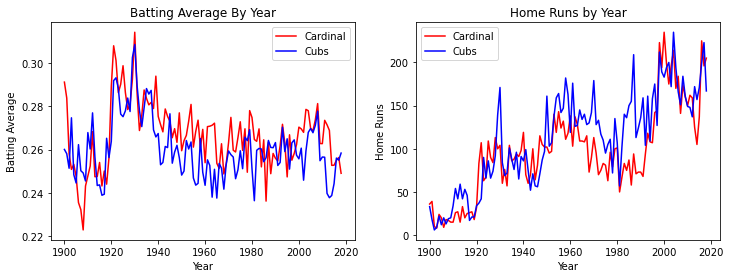

In [25]:
plt.figure(figsize=[12,4])
year_range = list(range(1900, 2019))

plt.subplot(1, 2, 1)
plt.plot(year_range, stl_batting.loc[:, 'BA'], color = 'red', label = 'Cardinal') 
plt.plot(year_range, chi_batting.loc[:, 'BA'], color = 'blue', label = 'Cubs')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average By Year')


plt.subplot(1,2,2)
plt.plot(year_range, stl_batting.loc[:, 'HR'], color = 'red', label = 'Cardinal') 
plt.plot(year_range, chi_batting.loc[:, 'HR'], color = 'blue', label = 'Cubs')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Home Runs')
plt.title('Home Runs by Year')

plt.show()

In [26]:
np.round(np.mean(stl_batting.BA > chi_batting.BA), 4)

0.7143

In [27]:
np.round(np.mean(stl_batting.HR > chi_batting.HR), 4)

0.3782